In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Define the image size for resizing


In [2]:
IMG_SIZE = 256
# Define the path to the dataset
data_dir = 'SIRO_dataset/'

# Define categories for classification
categories = ['oil', 'non_oil']

Load and Preprocess Images
This section will load images from the SIRO_dataset directory, resize them, normalize pixel values, and create corresponding labels

In [6]:
# Initialize lists to hold the images and labels
data = []
labels = []

# Load and preprocess the dataset
for category in categories:
    path = os.path.join(data_dir, category)
    class_label = 1 if category == 'non_oil' else 0
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        try:
            # Read the image in grayscale mode
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize the image to the defined size
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            # Append the image and label to the lists
            data.append(img_resized)
            labels.append(class_label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Print the shapes to verify the data
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Data shape: (5614, 256, 256, 1)
Labels shape: (5614,)


# Split the data into training and testing sets

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (4491, 256, 256, 1)
Testing data shape: (1123, 256, 256, 1)


Display Sample Images

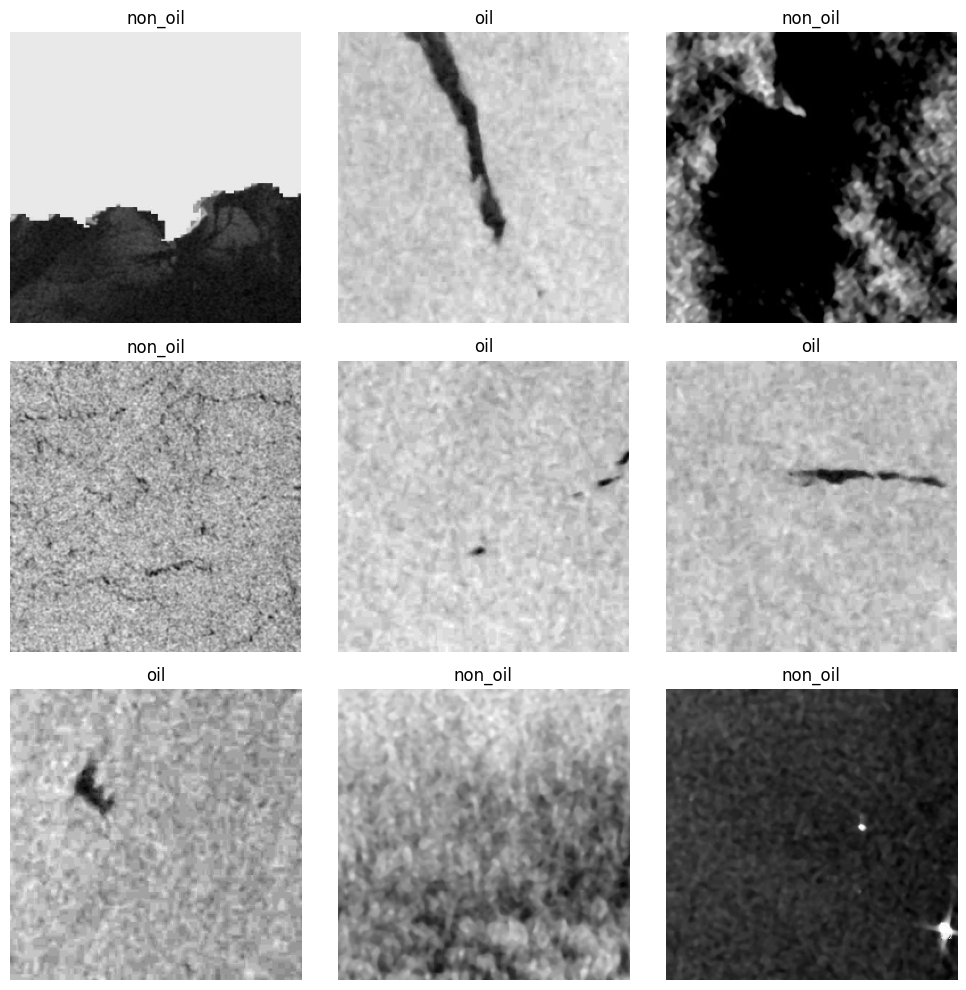

In [9]:
# Define a function to plot sample images
def plot_sample_images(images, labels, categories):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        idx = np.random.randint(0, len(images))
        plt.imshow(images[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        plt.title(categories[labels[idx]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot sample images from the training set
plot_sample_images(X_train, y_train, categories)


#Save Preprocessed Data

In [10]:
# Define paths to save the preprocessed data
X_train_path = 'preprocessed_data/X_train.npy'
y_train_path = 'preprocessed_data/y_train.npy'
X_test_path = 'preprocessed_data/X_test.npy'
y_test_path = 'preprocessed_data/y_test.npy'

# Create the directory if it does not exist
os.makedirs('preprocessed_data', exist_ok=True)

# Save the data
np.save(X_train_path, X_train)
np.save(y_train_path, y_train)
np.save(X_test_path, X_test)
np.save(y_test_path, y_test)

print("Preprocessed data saved successfully.")


Preprocessed data saved successfully.
